In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from prophet import Prophet

In [4]:
path = "https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/raw/master/data/AirPassengers.csv"
df = pd.read_csv(path)

Preview dataset and summary

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
df.rename(columns = {'#Passengers': 'Airpassengers'}, inplace=True)

In [10]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          144 non-null    object
 1   Airpassengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB
None
(144, 2)


In [11]:
# change the month column to datetime type
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.dtypes

Month            datetime64[ns]
Airpassengers             int64
dtype: object

In [13]:
# rename columns to ds and y
df = df.rename(columns = {'Month': 'ds', 'Airpassengers': 'y'})
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## One other way we could have done that is


In [16]:
df1 = pd.read_csv(path, header=0)

df1.columns = ['ds', 'y']
df1['ds'] = pd.to_datetime(df1['ds'])
df1.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Visualize the data

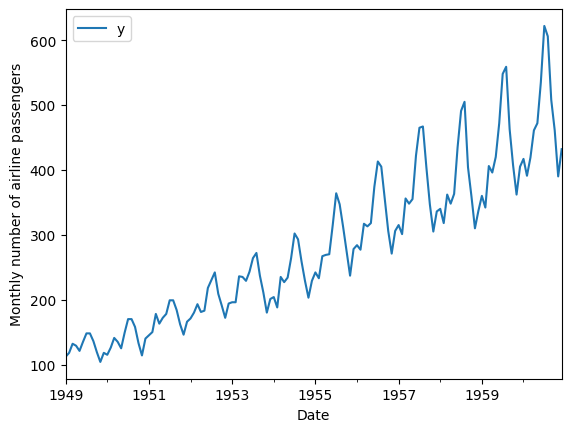

In [21]:
# visualize before renaming cols to ds and y
ax = df.set_index('ds').plot()
ax.set_ylabel('Monthly number of airline passengers')
ax.set_xlabel('Date')
plt.show()

Time forecasting

In [25]:
# set the uncertainity level to 95% (default is 80%)
model = Prophet(interval_width=0.95)

In [26]:
model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkj7ik1j8/_nlgzilk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkj7ik1j8/8e4s1oa1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91668', 'data', 'file=/tmp/tmpkj7ik1j8/_nlgzilk.json', 'init=/tmp/tmpkj7ik1j8/8e4s1oa1.json', 'output', 'file=/tmp/tmpkj7ik1j8/prophet_modelfxitkex4/prophet_model-20230708142000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# create our dataset on which to make future predictions using make_future_dataframe function in prophet
# with 36 datestamps and MS as start of the month since we are working with monthly data
future_dates = model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [29]:
forecast  = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,86.004944,39.857381,128.524580
1,1949-02-01,79.483800,36.159227,123.506769
2,1949-03-01,111.013077,66.566124,153.304593
3,1949-04-01,108.711340,61.841554,150.798180
4,1949-05-01,112.087749,70.025721,155.730409


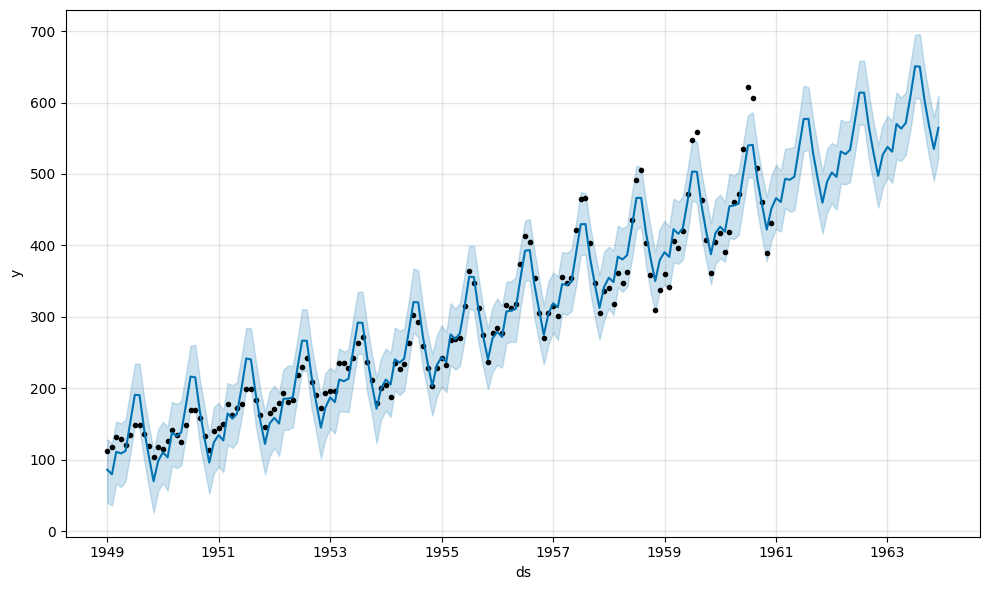

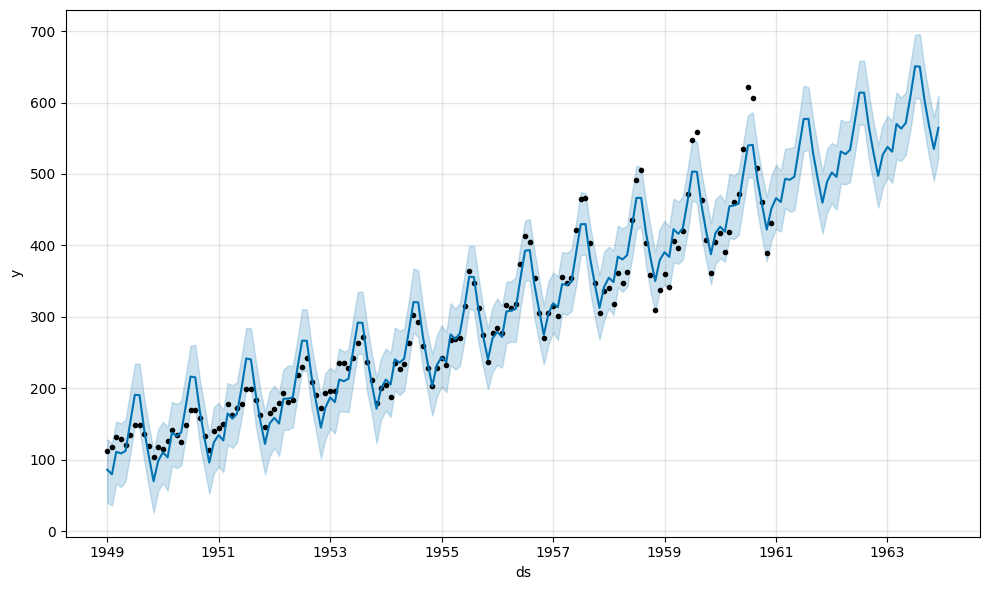

In [30]:
# plot results of our forecast
model.plot(forecast, uncertainty=True)

Let's now try to create our own dataset on which to predict

In [33]:
df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [37]:
train = df.drop(df.index[-12:])

model_1 = Prophet(interval_width=0.95)
model_1.fit(train)

future_1 = list()
for i in range(1,13):
  date = '1960-%02d' % i
  future_1.append([date])

future_1 = pd.DataFrame(future_1)
future_1.columns = ['ds']
future_1['ds'] = pd.to_datetime(future_1['ds'])
forecast_1 = model_1.predict(future_1)

y_true = df['y'][-12:].values
y_pred = forecast_1['yhat'].values

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkj7ik1j8/ydb7lpbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkj7ik1j8/e2z5qh0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74356', 'data', 'file=/tmp/tmpkj7ik1j8/ydb7lpbl.json', 'init=/tmp/tmpkj7ik1j8/e2z5qh0f.json', 'output', 'file=/tmp/tmpkj7ik1j8/prophet_modelegudln1p/prophet_model-20230708144546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:45:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [38]:
mae = mean_absolute_error(y_true, y_pred)
print("MAE ", round(mae,2))

MAE  33.39


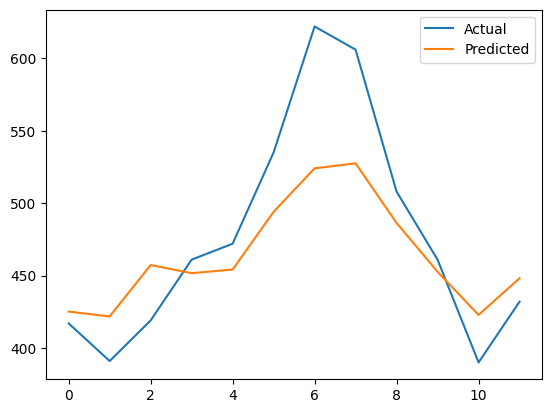

In [39]:
plt.plot(y_true, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.show()